In [16]:
import pandas as pd
import numpy as np
import re

In [3]:
df = pd.read_csv('../data/vehicles.csv')

In [4]:
outback = df[df.model == 'outback']
del df
outback.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url', 'state', 'lat', 'long', 'posting_date'], inplace=True, axis=1)

In [6]:
outback = outback[~outback.condition.isin(['salvage', 'new'])]

In [15]:
outback[outback.description.isin(outback.condition.unique().tolist())]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description


In [11]:
for i in outback[outback.condition.isna()]['description'].tolist():
    print('\n=============')
    print(i)
    print('=============\n')

Windows Heated Windshield Wiper Rests.,                         Audio Auxiliary Input: IPod/IPhone Integration.,                Power Windows: With Safety Reverse.,                            Power Steering Speed-Proportional.,                             Inside Rearview Mirror Auto-Dimming.,                           Universal Garage Door Opener Homelink.,                         Airbags - Front - Dual Seat Cushion.,                           Steering Wheel Mounted Controls Paddle Shifter.,                Air Conditioning - Front - Dual Zones.,                         Doors Rear Door Type: Power Liftgate.,                          Air Conditioning - Front - Automatic Climate Control.,          Driver Seat Power Adjustments: 10.,                             Warnings And Reminders Lamp Failure Low Fuel Engine Oil Coolant. Leskovar Mitsubishi address:    3020 W. Clearwater Avenue Leskovar Mitsubishi WA, 99336phone:      ☎ (509) 774-5879 ext 147text:       Text 147 to (509) 774-5879 for m

In [4]:
outback.groupby(['year', 'condition']).mean().loc[2001]

,price,odometer
condition,,
excellent,4349.500000,123615.500000
fair,1233.333333,153666.666667
good,2327.083333,208066.600000


In [5]:
outback.rename({'price':'USD'}, axis=1, inplace=True)

In [6]:
outback['CAD'] = outback['USD'] * 1.26

In [7]:
outback.rename({'odometer':'miles'}, axis=1, inplace=True)
outback['km'] = outback['miles'] * 1.609

In [8]:
outback.groupby(['year', 'condition']).mean().loc[2001]

,USD,miles,CAD,km
condition,,,,
excellent,4349.500000,123615.500000,5480.370,198897.339500
fair,1233.333333,153666.666667,1554.000,247249.666667
good,2327.083333,208066.600000,2932.125,334779.159400


In [9]:
outback.groupby(['year', 'cylinders', 'condition']).mean()

USD          miles       CAD  \
year   cylinders   condition                                          
1995.0 6 cylinders fair        2000.000000  156000.000000   2520.00   
1996.0 4 cylinders fair         800.000000     267.000000   1008.00   
                   good        1200.000000            NaN   1512.00   
1997.0 4 cylinders fair        1225.000000  222000.000000   1543.50   
                   good         850.000000  162000.000000   1071.00   
...                                    ...            ...       ...   
2019.0 4 cylinders like new   26414.285714   20685.142857  33282.00   
                   new        25500.000000    1930.000000  32130.00   
       6 cylinders excellent  26137.500000   22500.000000  32933.25   
                   good       24490.000000   27433.500000  30857.40   
2020.0 4 cylinders like new   26437.500000   17200.000000  33311.25   

                                         km  
year   cylinders   condition                 
1995.0 6 cylinders fair       251004.000000  
1996.0 4 cylinders fair          429.603000  
                   good                 NaN  
1997.0 4 cylinders fair       357198.000000  
                   good       260658.000000  
...                                     ...  
2019.0 4 cylinders like new    33282.394857  
                   new          3105.370000  
       6 cylinders excellent   36202.500000  
                   good        44140.501500  
2020.0 4 cylinders like new    27674.800000  

[115 rows x 4 columns]

In [10]:
import matplotlib.pyplot as plt

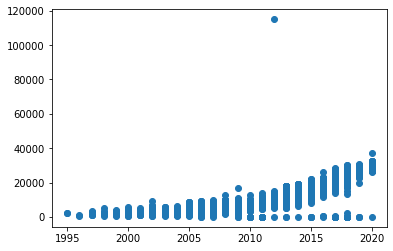

In [11]:
plt.scatter(outback.year, outback.USD)

In [12]:
outback.miles.fillna(method='ffill')

57        138247.0
520        98791.0
2099      101802.0
2965      116000.0
3369       39100.0
            ...   
457541    144067.0
457611     17019.0
457739     36939.0
457755     16845.0
457849      8928.0
Name: miles, Length: 1791, dtype: float64

In [13]:
outback.drop(416548, inplace=True)
outback.drop(440910, inplace=True)

In [14]:
outback.cylinders.unique()

array([nan, '6 cylinders', '4 cylinders', '5 cylinders', 'other'],
      dtype=object)

In [15]:
cyl_4 = outback[outback.cylinders == '6 cylinders']
cyl_6 = outback[outback.cylinders == '4 cylinders']

<AxesSubplot:xlabel='year', ylabel='CAD'>

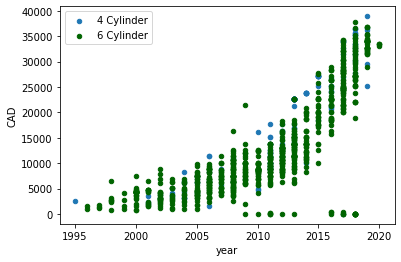

In [16]:
ax = cyl_4.plot(kind='scatter', x='year', y='CAD', label='4 Cylinder')
cyl_6.plot(kind='scatter', x='year', y='CAD', label='6 Cylinder', color='DarkGreen', ax=ax)


In [17]:
outback.groupby(['year', 'cylinders', 'condition']).mean().loc[2001]

USD     miles      CAD           km
cylinders   condition                                             
4 cylinders excellent  4349.500000  123615.5  5480.37  198897.3395
            fair       1350.000000  155500.0  1701.00  250199.5000
            good       2150.000000  196750.0  2709.00  316570.7500
6 cylinders good       2058.333333  197000.0  2593.50  316973.0000

## Fitting a line

In [18]:
# Eyeballing a slope of -0.11 and an intercept of 35000
def p(x,slope=-0.11, intercept=35000):
    return slope*x + intercept

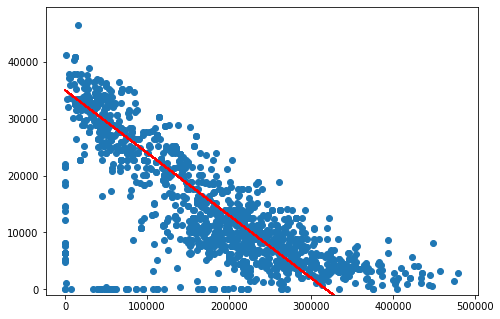

In [19]:


fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])

a1.scatter(outback.km , outback.CAD)
a1.plot(outback.km, p(outback.km, -0.11, 35000), color='red')

a1.set_ylim(-1000)
plt.show()

In [20]:
def sum_error(f, data):
    errors = [abs(f(x) - y) for (x,y) in data]
    return sum(errors)

def sum_square_error(f, data):
    squared_errors = [(f(x) -y)**2 for (x,y) in data]
    return sum(squared_errors)

In [21]:
def f(x):
    return 2*x

def g(x):
    return 1-x

In [22]:
sum_error(p, np.asarray(outback[['km', 'CAD']].dropna()))

7891966.501709987

In [23]:
sum_square_error(p, np.asarray(outback[['km', 'CAD']].dropna()))

86862525271.98022

## Exploring the space of all linear functions

In [24]:
# Finding a function p(x) = ax + b that returns the lowest cost for a sum_squared_error function.
outback_mileage_price = np.asarray(outback[['km', 'CAD']].dropna())

def sum_square_error(f, data):
    squared_errors = [(f(x) -y)**2 for (x,y) in data]
    return sum(squared_errors)

def coefficient_cost(a,b):
    def p(x):
        return a*x + b
    return sum_square_error(p, outback_mileage_price)

In [25]:
coefficient_cost(-0.11, 35000)

86862525271.98022

## Finding line of best fit

In [26]:
from math import sqrt

def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))
    
def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)
    
def gradient_descent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

In [27]:
gradient_descent(coefficient_cost, -0.11, 35000)

<ipython-input-26-9eb1ccdad74d>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (f(xmax) - f(xmin)) / (xmax - xmin)


(-1.0578100921621826e+22, 11180.046516054394)

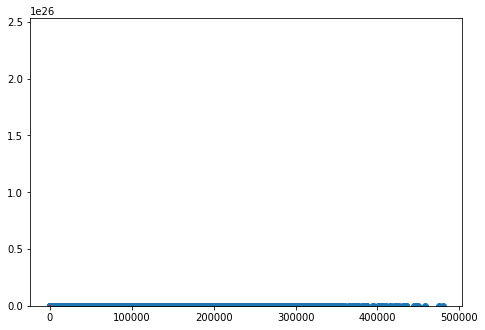

In [28]:
# Needs to be scaled
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])

a1.scatter(outback.km , outback.CAD)
a1.plot(outback.km, p(outback.km, -1.0578100921621826e+22, 11180.046516054394), color='red')

a1.set_ylim(-1000)
plt.show()

In [29]:
gradient_descent(coefficient_cost, -0.11, 35000)[1]

<ipython-input-26-9eb1ccdad74d>:7: RuntimeWarning: invalid value encountered in double_scalars
  return (f(xmax) - f(xmin)) / (xmax - xmin)


11180.046516054394

## Rescaling data

In [30]:
def scaled_cost_function(c,d):
    return coefficient_cost(0.5*c, 50000*d)/1e13

In [31]:
c, d = gradient_descent(scaled_cost_function, 0,0)

In [32]:
c, d

(-0.15558575382537013, 0.5695923284778299)

In [33]:
a = 0.5*c
b=5000*d

In [34]:
a, b

(-0.07779287691268506, 2847.96164238915)

In [35]:
def outback_price_linear(miles):
    return -0.07779287691268506*miles + 2847.96164238915

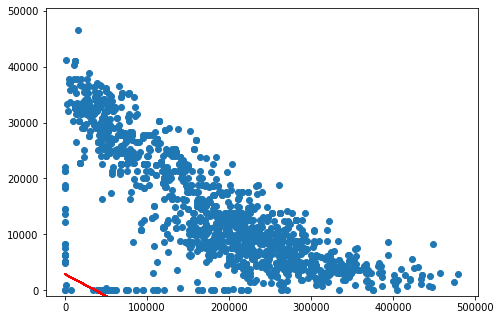

In [36]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])

a1.scatter(outback.km , outback.CAD)
a1.plot(outback.km, outback_price_linear(outback.km), color='red')

a1.set_ylim(-1000)
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression

In [47]:
regressor = LinearRegression(fit_intercept=True)

regressor.fit(np.asarray(outback.km.fillna(method='ffill')).reshape(-1,1), np.asarray(outback.CAD).reshape(-1,1))

LinearRegression()

In [51]:
regressor.score(np.asarray(outback.km.fillna(method='ffill')).reshape(-1,1), np.asarray(outback.CAD).reshape(-1,1))

0.4994678097780233

In [55]:
regressor.coef_[0]

array([-0.07232982])

In [53]:
regressor.intercept_

array([27160.31551584])

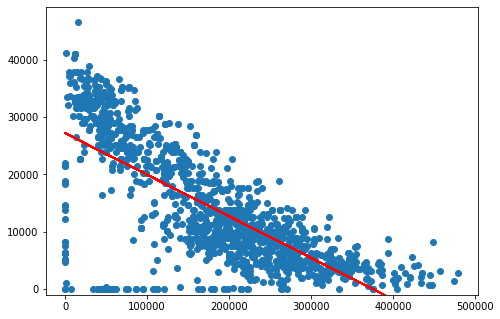

In [56]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])

a1.scatter(outback.km , outback.CAD)
a1.plot(outback.km, p(outback.km, regressor.coef_[0], regressor.intercept_), color='red')

a1.set_ylim(-1000)
plt.show()

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
from sklearn.datasets import load_boston

boston = load_boston()

In [64]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)

In [80]:
polynomial = PolynomialFeatures(degree=3, include_bias=False)
poly_feats = polynomial.fit(outback[['km']].fillna(method='ffill'))

In [81]:
regression = LinearRegression()
model = regression.fit(features, outback[['CAD']])

ValueError: Found input variables with inconsistent numbers of samples: [506, 1789]

In [72]:
outback[['km']].fillna(method='ffill').shape

(1789, 1)

In [76]:
outback.CAD

57        10707.48
520       11314.80
2099      20131.02
2965      11277.00
3369      30737.70
            ...   
457541     8813.70
457611    35277.48
457739    28978.74
457755    33364.80
457849    37793.70
Name: CAD, Length: 1789, dtype: float64

In [78]:
outback['km'].fillna(method='ffill')

57        222439.423
520       158954.719
2099      163799.418
2965      186644.000
3369       62911.900
             ...    
457541    231803.803
457611     27383.571
457739     59434.851
457755     27103.605
457849     14365.152
Name: km, Length: 1789, dtype: float64